### preambule

In [ ]:
## importing stuff
import os
import pickle
from sys import path as syspath
syspath.append(os.path.expanduser("~/srdjan_functs/"))
import javabridge
from bioformats import JARS as bfJARS
javabridge.start_vm(class_path=bfJARS, max_heap_size="20G")
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
# %aimport islets

from IPython.display import display
import pandas as pd

from islets.Recording import Recording, saveMovie
from islets.numeric import power_spectrum, rebin
from islets.utils import show_movie, saveRois
# from islets.Regions1 import getPeak2BoundaryDF, getGraph_of_ROIs_to_Merge, mergeBasedOnGraph

from caiman import movie as cmovie

from matplotlib.colors import LogNorm

In [ ]:
from islets.Regions  import Regions as Regions0
from islets.Regions1 import Regions as Regions1

In [ ]:
from islets.Regions1 import getStatImages

In [ ]:
from cv2 import GaussianBlur
from islets.numeric import robust_max
from islets.numeric import get_sep_th

In [ ]:
# from copy import deepcopy
fracSaturTh = .05
# movieFreq = 2
cmap = plt.cm.Greys
cmap.set_bad("lime")
pd.set_option('display.max_rows', 100)

In [ ]:
plt.rcParams["animation.embed_limit"] = 500

In [ ]:
date, exp, ser = "2020_09_16	experiment68c	all".split("\t")

In [ ]:
exp = exp.capitalize()
recFile = f"/data/Sandra/{date.split('_')[0]}/{date}/{exp}.lif"

In [ ]:
# recFile, ser = "/data/Sandra/2019/2019_10_15/Experiment38b.lif", "Series042"
# recFile, ser = "/data/Sandra/2020/2020_08_05/Experiment63d.lif", "Series004"

In [ ]:
# from caiman import load as cload

In [ ]:
rec = Recording(recFile)
rec.metadata

In [ ]:
ser = "Series001"

In [ ]:
rec.import_series(ser,restrict=(0,10))

In [ ]:
metadata = rec.Series[ser]['metadata']

In [ ]:
movie = cmovie(rec.Series[ser]['data'],fr = metadata.Frequency)

In [ ]:
movie.shape

In [ ]:
np.array([5,6,7])/metadata.pxSize

In [23]:
regions1 = Regions1(movie, gSig_filt=(11), img_th=.1)

In [24]:
regions1.df.shape

(4, 9)

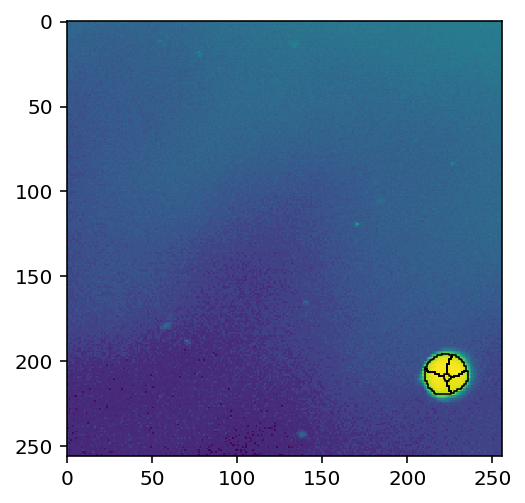

In [25]:
regions1.plotEdges()

In [ ]:
# saveMovie(movie,f"/home/jupyter-srdjan/presentations/examples/{exp}_{ser}.mp4", maxFreq=1,dpi=300)

In [ ]:
statImages = getStatImages(movie, downsampleFreq=2)

In [ ]:
statImages["mean"]

In [ ]:
plt.imshow(im)

In [ ]:
for el in zip(*np.where(im<0.1)):break

In [ ]:
el

In [ ]:
excl = list(zip(*np.where(statImages["mean"]<2)))
print (len(excl))
regions = Regions1(movie[:,:,:], diag=True, excludePixels=excl, mode="mean")
regions.df.shape

In [ ]:
saveMovie(movie, "embed")

In [ ]:
regions.plotEdges()

In [ ]:
regions.calcTraces()

In [ ]:
regions.examine3()

In [ ]:
im = statImages["mean"][:30,:].copy()
# im[im<2] = 0
# im = GaussianBlur(im, (5,5,),-1)
excl = list(zip(*np.where(im.T<1)))
regions = Regions1(im, diag=False, mode="custom", excludePixels=excl)

In [ ]:
regions.df.shape

In [ ]:
regions.df = regions.df[regions.df["size"]>2]

In [ ]:
regions.plotEdges()
regions.plotPeaks(color="k")

In [ ]:
regions.calcTraces()`

In [ ]:
regions.examine3()

In [ ]:
plt.hist(statImages["mean"].flat,100,log=True);

In [ ]:
regions = 

In [ ]:
regions = regions.df.query("peakValue>.2")

### Save images

In [ ]:
statImages.keys()

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5), sharex=True, sharey=True)
for k,ax in zip(['mean',"highperc"],axs):
    ax.imshow(statImages[k], cmap="Greys")
    ax.set_xticks([])
    ax.set_yticks([])
plt.subplots_adjust(wspace=.01)
fig.savefig("/home/jupyter-srdjan/presentations/examples/mean_max_lin.png",dpi=300)

In [ ]:
plt.hist(statImages["mean"].flat,100, histtype="step")
plt.hist(statImages["highperc"].flat,100, histtype="step");

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5), sharex=True, sharey=True)
for k,ax in zip(['mean',"highperc"],axs):
    ax.imshow(statImages[k], cmap="Greys", norm=LogNorm(), vmin=1,vmax=20)
    ax.set_xticks([])
    ax.set_yticks([])
plt.subplots_adjust(wspace=.01)
fig.savefig("/home/jupyter-srdjan/presentations/examples/mean_max_lin.png",dpi=300)

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10.3,5),gridspec_kw={"width_ratios":[5,5,.3]})
k = "mean"
axs[0].imshow(statImages[k], cmap="Greys", vmin=1,vmax=20)
im = axs[1].imshow(statImages[k], cmap="Greys", norm=LogNorm(), vmin=1,vmax=20)
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.subplots_adjust(wspace=.01)
plt.colorbar(im, cax=axs[-1])
fig.savefig("/home/jupyter-srdjan/presentations/examples/mean_lin_log.png",dpi=300)

In [ ]:
for k in ['mean',"highperc"]:
    for log in [True,False]:
        fig = plt.figure(figsize=(5+int(log),5))
        if log:
            plt.imshow(statImages[k], cmap="Greys", norm=LogNorm(), vmin=1,vmax=20)
            plt.colorbar()
        else:
            plt.imshow(statImages[k], cmap="Greys")
        plt.xticks([])
        plt.yticks([])
        plt.subplots_adjust(wspace=.01)
        name = k
        if log: name += "_log"
        else: name += "_lin"
            
        fig.savefig(f"/home/jupyter-srdjan/presentations/examples/{name}.png",dpi=300)

In [ ]:
Regions.__module__

In [ ]:
movie.shape

In [ ]:
np.savetxt("/home/jupyter-srdjan/presentations/examples/mean_image.txt", statImages["mean"])

### Regions (old and new)

In [ ]:
x0,x1,y0,y1 = 50,150,50,150

#### old

In [ ]:
regions0 = Regions0({"mean":statImages["mean"][x0:x1,y0:y1]}, gSig_filt=(4,3), diag=True, mode="mean")
regions0.df.drop(index=regions0.df.query("size<5").index, inplace=True)
regions0.update(movie)
regions0.plotEdges(imkw_args={"cmap":"Greys"},color="red")

In [ ]:
regions0.metadata = metadata

In [ ]:
# saveRois(regions0, "/home/jupyter-srdjan/presentations/examples","regions0", add_date=False, formats=["vienna"])

In [ ]:
regions0 = Regions1(regions0)

In [ ]:
regions0.update(movie[:,x0:x1,y0:y1])

In [ ]:
for col in regions0.df.columns:
    if "_" in col:
        del regions0.df[col]
try: del regions0.showTime
except: pass

In [ ]:
regions0.movie.fr

In [ ]:
regions0.examine3()

In [ ]:
m = regions0.movie.copy()
for i,j in sum(regions0.df.pixels,[]):
#     m[:,i,j] = 0
    m[:,i,j] = m[:,i,j].mean()

In [ ]:
show_movie(m,
           figScale=3,
           log=True,
           additionalPlot=lambda ax: regions0.plotEdges(image=False, ax=ax, color="navy"),
           saveName="/home/jupyter-srdjan/presentations/examples/regions0_movie_masked.mp4",
           NTimeFrames=400,
           out="save",
           dpi=300,
           tmax=len(m)/m.fr
          )

#### new

In [ ]:
regions1 = Regions1(movie[:,x0:x1,y0:y1],gSig_filt=(3,4),diag=True)
plt.figure(figsize=(7,7))
regions1.plotEdges(lw=.5)
regions1.plotPeaks(color="k", image=True)

In [ ]:
regions1.calcTraces()

In [ ]:
regions1.protocol = pd.DataFrame({
    "compound": ["glucose","glucose","Ca","Ca"],
    "concentration": ["8mM","6mM","2mM","0.4mM"],
    "t_begin": [0,700,0,800],
    "t_end": [700,1000,800,1000]
})

In [ ]:
regions1.metadata = metadata

In [ ]:
# m = regions1.movie.copy()
# for i,j in sum(regions1.df.pixels,[]):
# #     m[:,i,j] = 0
#     m[:,i,j] = m[:,i,j].mean()

# show_movie(m,
#            figScale=3,
#            log=True,
#            additionalPlot=lambda ax: regions1.plotEdges(image=False, ax=ax, color="navy"),
#            saveName="/home/jupyter-srdjan/presentations/examples/regions1_movie_masked.mp4",
#            NTimeFrames=400,
#            out="save",
#            dpi=300,
#            tmax=len(m)/m.fr
#           )

In [ ]:
import PIL

In [ ]:
m_rshifted = movie[:1000,x0:x1,y0:y1]

In [ ]:
im = PIL.Image.fromarray(m_rshifted[0])
im.save("/home/jupyter-srdjan/presentations/examples/movie_sample.tiff",
        save_all=True,
        append_images=[PIL.Image.fromarray(m_rshifted[i]) for i in range(1,len(m_rshifted))],
        compression="tiff_deflate"
       )

In [ ]:
regions1.image.shape[0]*metadata.pxSize/4

In [ ]:
regions1.examine3()

In [ ]:
regions1 = Regions1(regions1)

In [ ]:
# saveRois(regions1, "/home/jupyter-srdjan/presentations/examples","regions1", add_date=False, formats=["vienna"])

In [ ]:
regions1.calc_peaks(10)
regions1.calc_peaks(7)
regions1.calc_peaks(5)

In [ ]:
import plotly_express as plx

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10,3), sharey=True, sharex=True)
for ts, ax in zip([5,7,10], axs):
    pks = regions1.peaks["%g"%ts]
    ax.hexbin(pks.iloc[:,1], pks.iloc[:,0], mincnt=1,bins="log", cmap="hot", yscale="log")

In [ ]:
pks = regions1.peaks["7"]
# plx.scatter(pks, width = 600, x=pks.columns[1],y=pks.columns[0])

In [ ]:
from scipy.stats import median_absolute_deviation

In [ ]:
summary = []#pd.DataFrame(columns=["roi", "pH","mean","std",])

for (roi),df in pks.groupby(["roi"]):
    if len(df)<10: continue
    summary += [{
        "roi":roi,
        "half width":  np.median(df.iloc[:,1]),
        "half width err":  median_absolute_deviation(df.iloc[:,1])/len(df)**.5,
        "spiking period": np.median( df.t0.diff()[1:]),
        "spiking period err": median_absolute_deviation( df.t0.diff()[1:])/len(df)**.5,
    }]

summary = pd.DataFrame(summary)

In [ ]:
fig = plx.scatter(summary,x="half width",y="spiking period", width=700, height=700, 
                  marginal_x="box", marginal_y="box",error_x="half width err", error_y="spiking period err")
#                   marginal_x="histogram", marginal_y="histogram", error_x="half width err", error_y="spiking period err")

fig.update_traces({"error_x_width":.4, "error_y_width":.4,"error_x_thickness":.7,"error_y_thickness":.7},col=1,row=1)
fig.show()

### fitting

In [ ]:
ts = 7
regions1.fast_filter_traces(ts)
zScore = np.vstack(regions1.df["zScore_%g"%ts])
X = zScore>2.5

In [ ]:
np.where((zScore>7).sum(1)>100)

In [ ]:
# [(roi,df.iloc[:,0].mean()) for roi, df in spikes.groupby("roi")]

In [ ]:
iShow = 145, 190#regions1.df.index[np.argmax((zScore>4).sum(1))]

In [ ]:
# regions.df["_trace"] = deepcopy(regions.df.trace)

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
from islets.fitting import fit_spikes, myShape

In [ ]:
regions = regions1

In [ ]:
t = regions.time.copy()
ts = 13
sl,fs,zs = regions.fast_filter_traces(ts, write=False,
                                      normalize=True,
#                                       z_sp=3,
                                      verbose=True,
#                                       Npoints=20
                                     )
try:
    tt = regions.showTime["%g"%ts]
except:
    tt = t.copy()

In [ ]:
spikes = regions.calc_peaks(
    ts=ts,
    save=False,
    t=tt,
    zScores=zs,
#     z_th=5
#     smooth=0
)

In [ ]:
iShow

In [ ]:
%matplotlib notebook

In [ ]:
fitDF = []
fig, axs = plt.subplots(len(iShow),1,figsize=(9,6), sharey=False, sharex=True)
# fig, axs = plt.subplots(1,1,figsize=(9,4), sharey=False, sharex=True)
for i,ix in enumerate(iShow):
    tmpdf = fit_spikes(
        t, regions.df.trace[ix],
#        tt, sl[i]+fs[i],
       spikes.query(f"roi=={ix}"),
#        ifit = 20,
       colorCode={"myShape":"C3"},
       plot=True,
       ax=axs[i],
       half_width_threshold=ts*.12
      )
    tmpdf["roi"]= ix 
    fitDF += [tmpdf]
#     axs[i].plot(tt,sl[i],"C1",lw=.8)
fitDF = pd.concat(fitDF)
# plt.xlim(regions.time[0], regions.time[0]+50)
plt.xlim(fitDF["loc"].min()-10, fitDF["loc"].max()+50)
plt.subplots_adjust(hspace=0.01)

In [ ]:
fitDF.iloc[:,4:]